# Data Investigation - Status

In [1]:
%matplotlib inline

import matplotlib
import numpy as np
from scipy import stats
import math
import matplotlib.pyplot as plt
import pandas as pd
from glob import glob
import datetime
import math

import seaborn as sns
sns.set()

### Import Data

In [ ]:
print('Loading Status Data...')

try:
    file_path_slug = '../../../datasets/bayareabikeshare/*_status_data.csv'

    # glob all files
    file_list = glob(file_path_slug)

    status_import = pd.DataFrame()

    counter = 1

    # load data from each file
    for file in file_list:

        chunks = []
        chunk_counter = 1
        chunksize = 10000
        num_chunks = math.ceil(sum(1 for row in open(file, 'r'))/chunksize)

        # import file in chunks
        for chunk in pd.read_csv(file, chunksize=chunksize, iterator=True):

            # append chunk to chunks list
            chunks.append(chunk)

            if chunk_counter == 1 or chunk_counter % math.ceil(num_chunks/10) == 0 or chunk_counter == num_chunks:
                print('\t[%s] finished chunk %s of %s' % (datetime.datetime.now().time(), chunk_counter, num_chunks))
            chunk_counter += 1

        if counter == 1:
            status_01 = pd.DataFrame()
            status_01 = pd.concat(chunks)
        elif counter == 2:
            status_02 = pd.DataFrame()
            status_02 = pd.concat(chunks)
        elif counter == 3:
            status_03 = pd.DataFrame()
            status_03 = pd.concat(chunks)
        elif counter == 4:
            status_04 = pd.DataFrame()
            status_04 = pd.concat(chunks)
        else:
            pass


        print('Finished file! (%d of %d)' % (counter, len(file_list)))
        counter += 1

    print('Data Loaded Successfully!')

except:
    print('oops... something went wrong importing the data :(')
    

### Clean and Write File

In [ ]:
print('[%s] Started status_01[\'time\'] Cleaning' % datetime.datetime.now().time())
status_01['time']   = pd.to_datetime(status_01['time'],   format="%Y/%m/%d %H:%M:%S").values.astype('<M8[m]')
status_01['dockcount'] = status_01.bikes_available + status_01.docks_available
status_01['utilization'] = status_01.docks_available / (status_01.bikes_available + status_01.docks_available)
print('\t[%s] Complete!\n' % datetime.datetime.now().time())

print('[%s] Started status_02[\'time\'] Cleaning' % datetime.datetime.now().time())
status_02['time']   = pd.to_datetime(status_02['time'],   format="%Y/%m/%d %H:%M:%S").values.astype('<M8[m]')
status_02['dockcount'] = status_02.bikes_available + status_02.docks_available
status_02['utilization'] = status_02.docks_available / (status_02.bikes_available + status_02.docks_available)
print('\t[%s] Complete!\n' % datetime.datetime.now().time())

print('[%s] Started status_03[\'time\'] Cleaning' % datetime.datetime.now().time())
status_03['time']   = pd.to_datetime(status_03['time'],   format="%m/%d/%Y %H:%M:%S").values.astype('<M8[m]')
status_03['dockcount'] = status_03.bikes_available + status_03.docks_available
status_03['utilization'] = status_03.docks_available / (status_03.bikes_available + status_03.docks_available)
print('\t[%s] Complete!\n' % datetime.datetime.now().time())

print('[%s] Started status_04[\'time\'] Cleaning' % datetime.datetime.now().time())
status_04['time']   = pd.to_datetime(status_04['time'],   format="%Y/%m/%d %H:%M:%S").values.astype('<M8[m]')
status_04['dockcount'] = status_04.bikes_available + status_04.docks_available
status_04['utilization'] = status_04.docks_available / (status_04.bikes_available + status_04.docks_available)
print('\t[%s] Complete!\n' % datetime.datetime.now().time())


# COncat all frames
print('[%s] Starting concat' % datetime.datetime.now().time())
status_data = pd.DataFrame()
status_data = pd.concat([status_01, status_02, status_03, status_04])
status_data.set_index('time', inplace=True)
print('\t[%s]Complete!\n' % datetime.datetime.now().time())
status_data.head()

In [ ]:
status_data = status_data[status_data.station_id != 87]

In [ ]:
status_data.info()

In [ ]:
# Write file
print('[%s] Writing to File' % datetime.datetime.now().time())
status_data.to_csv('../clean_data/status_data_cleaned.csv', encoding='utf-8')
print('\t[%s]Complete!\n' % datetime.datetime.now().time())

# Load Cleaned File

In [ ]:
print('Loading Cleaned Status Data...')

status_data = pd.DataFrame()
file = '../clean_data/status_data_cleaned.csv'

try:

    chunks = []
    chunk_counter = 1
    chunksize = 10000
    num_chunks = math.ceil(sum(1 for row in open(file, 'r'))/chunksize)

    # import file in chunks
    for chunk in pd.read_csv(file, chunksize=chunksize, iterator=True, parse_dates=['time']):

        # append chunk to chunks list
        chunks.append(chunk)

        if chunk_counter == 1 or chunk_counter % math.ceil(num_chunks/10) == 0 or chunk_counter == num_chunks:
            print('\t[%s] finished chunk %s of %s' % (datetime.datetime.now().time(), chunk_counter, num_chunks))
        chunk_counter += 1

    print('Concatenating Chunks')
    status_data = pd.DataFrame()
    status_data = pd.concat(chunks)
    print('Data Loaded Successfully!')

except:
    print('oops... something went wrong importing the data :(')

In [ ]:
status_data.head(10)

In [ ]:
status_data.drop(['dockcount', 'utilization'], axis=1, inplace=True)
status_data.sort_values(['station_id', 'time'], inplace=True)
status_data.head(10)

## Load Station Data

In [ ]:
station_data = pd.DataFrame()
station_data = pd.read_csv('../clean_data/station_data_cleaned.csv')
dock_data = pd.DataFrame()
dock_data['station_id'] = station_data['station_id']
dock_data['dock_count'] = station_data['dockcount']

In [ ]:
dock_data = pd.DataFrame()
dock_data['station_id'] = station_data['station_id']
dock_data['dock_count'] = station_data['dockcount']

In [ ]:
dock_data.head(3)

## Resampling

### 15 Minute Median

In [ ]:
print('[%s] Resample Cleanup Started' % datetime.datetime.now().time())
status_data_copy = status_data.copy()

# status_data_copy.reset_index(inplace=True)
status_data_copy.set_index(['station_id', 'time'], inplace=True)

print('[%s] Resampling on interval' % datetime.datetime.now().time())
# resample on 15minute interval median
status_15min_median = status_data_copy.groupby([pd.Grouper(level=0), pd.Grouper(freq='15T', level=-1)]).median()

print('[%s] Merge Dock Information' % datetime.datetime.now().time())
status_15min_median.reset_index(inplace=True)
merge_15min = pd.merge(status_15min_median, dock_data, on='station_id')
merge_15min.set_index(['station_id', 'time'], inplace=True)

print('[%s] Calculate Utilization' % datetime.datetime.now().time())
# calculate utilization, round off at 1.0 if overage are calculated, 
# some station data reports inaccuratly on resample
merge_15min['utilization'] = merge_15min['docks_available'] / merge_15min['dock_count']
merge_15min['utilization'] = merge_15min['utilization'].apply(lambda x: 1.0 if x > 1.0 else x)

merge_15min.reset_index(inplace=True)

print('[%s] Complete!' % datetime.datetime.now().time())
merge_15min.head(5)


In [ ]:
merge_15min.info()

In [ ]:
print('[%s] Writing to File' % datetime.datetime.now().time())
merge_15min.to_csv('../clean_data/status_data_15min_median_cleaned.csv', encoding='utf-8')
print('\t[%s]Complete!\n' % datetime.datetime.now().time())

### 1 Hour Median

In [ ]:
print('[%s] Resample Cleanup Started' % datetime.datetime.now().time())
status_data_copy = status_data.copy()

# status_data_copy.reset_index(inplace=True)
status_data_copy.set_index(['station_id', 'time'], inplace=True)

print('[%s] Resampling on interval' % datetime.datetime.now().time())
# resample on 15minute interval median
status_hour_median = status_data_copy.groupby([pd.Grouper(level=0), pd.Grouper(freq='H', level=-1)]).median()

print('[%s] Merge Dock Information' % datetime.datetime.now().time())
status_hour_median.reset_index(inplace=True)
merge_hour = pd.merge(status_hour_median, dock_data, on='station_id')
merge_hour.set_index(['station_id', 'time'], inplace=True)

print('[%s] Calculate Utilization' % datetime.datetime.now().time())
# calculate utilization, round off at 1.0 if overage are calculated, 
# some station data reports inaccuratly on resample
merge_hour['utilization'] = merge_hour['docks_available'] / merge_hour['dock_count']
merge_hour['utilization'] = merge_hour['utilization'].apply(lambda x: 1.0 if x > 1.0 else x)

merge_hour.reset_index(inplace=True)

print('[%s] Complete!' % datetime.datetime.now().time())
merge_hour.head(5)

print('[%s] Writing to File' % datetime.datetime.now().time())
merge_hour.to_csv('../clean_data/status_data_hour_median_cleaned.csv', encoding='utf-8')
print('\t[%s]Complete!\n' % datetime.datetime.now().time())

In [ ]:
merge_hour.info()

## PreCleaned Files

### Load Status Data

In [2]:
file = '../clean_data/status_data_15min_median_cleaned.csv'

status_15min = pd.DataFrame()

chunks = []
chunk_counter = 1
chunksize = 10000
num_chunks = math.ceil(sum(1 for row in open(file, 'r'))/chunksize)

# import file in chunks
for chunk in pd.read_csv(file, chunksize=chunksize, iterator=True, parse_dates=['time']):

    # append chunk to chunks list
    chunks.append(chunk)

    if chunk_counter == 1 or chunk_counter % math.ceil(num_chunks/10) == 0 or chunk_counter == num_chunks:
        print('\t[%s] finished chunk %s of %s' % (datetime.datetime.now().time(), chunk_counter, num_chunks))
    chunk_counter += 1

status_15min = pd.concat(chunks)

status_15min.info()


	[01:21:45.436714] finished chunk 1 of 726
	[01:21:47.920878] finished chunk 73 of 726
	[01:21:50.631040] finished chunk 146 of 726
	[01:21:53.409784] finished chunk 219 of 726
	[01:21:56.222213] finished chunk 292 of 726
	[01:21:58.870384] finished chunk 365 of 726
	[01:22:01.684541] finished chunk 438 of 726
	[01:22:04.503321] finished chunk 511 of 726
	[01:22:07.265323] finished chunk 584 of 726
	[01:22:10.006680] finished chunk 657 of 726
	[01:22:12.449528] finished chunk 726 of 726
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7250117 entries, 0 to 7250116
Data columns (total 7 columns):
Unnamed: 0         int64
station_id         int64
time               datetime64[ns]
bikes_available    float64
docks_available    float64
dock_count         float64
utilization        float64
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 442.5 MB


In [3]:
status_15min.drop('Unnamed: 0', axis=1, inplace=True)
status_15min.set_index('time', inplace=True)
status_15min.head()

,station_id,bikes_available,docks_available,dock_count,utilization
time,,,,,
2013-08-29 12:00:00,2,2.0,25.0,27.0,0.925926
2013-08-29 12:15:00,2,2.0,25.0,27.0,0.925926
2013-08-29 12:30:00,2,2.0,25.0,27.0,0.925926
2013-08-29 12:45:00,2,2.0,25.0,27.0,0.925926
2013-08-29 13:00:00,2,2.0,25.0,27.0,0.925926


### Analysis

In [4]:
status_data = status_15min.copy()

In [5]:
status_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7250117 entries, 2013-08-29 12:00:00 to 2016-08-31 23:45:00
Data columns (total 5 columns):
station_id         int64
bikes_available    float64
docks_available    float64
dock_count         float64
utilization        float64
dtypes: float64(4), int64(1)
memory usage: 331.9 MB


In [6]:
status_data.head()

,station_id,bikes_available,docks_available,dock_count,utilization
time,,,,,
2013-08-29 12:00:00,2,2.0,25.0,27.0,0.925926
2013-08-29 12:15:00,2,2.0,25.0,27.0,0.925926
2013-08-29 12:30:00,2,2.0,25.0,27.0,0.925926
2013-08-29 12:45:00,2,2.0,25.0,27.0,0.925926
2013-08-29 13:00:00,2,2.0,25.0,27.0,0.925926


In [7]:
top_am_commute_start_terms = [50, 54, 55, 61, 67, 69, 70, 73, 74, 77]
temp = status_data[status_data.station_id.isin(top_am_commute_start_terms)]

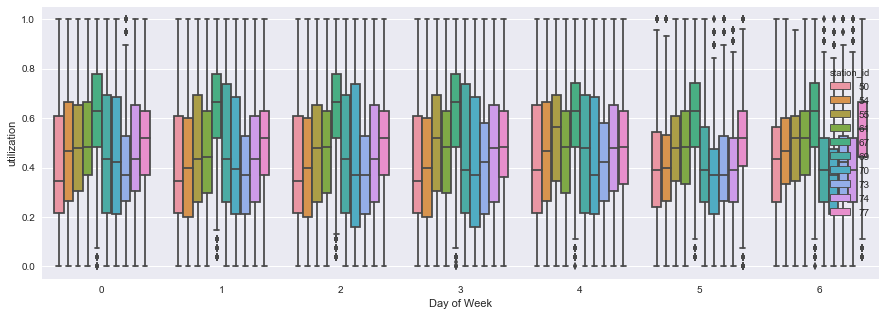

In [11]:
plt.subplots(figsize=(15,5))
ax = sns.boxplot(x=temp.index.dayofweek, y="utilization", hue="station_id", data=temp)

ax.set(xlabel='Day of Week')
# plt.legend()
plt.show()



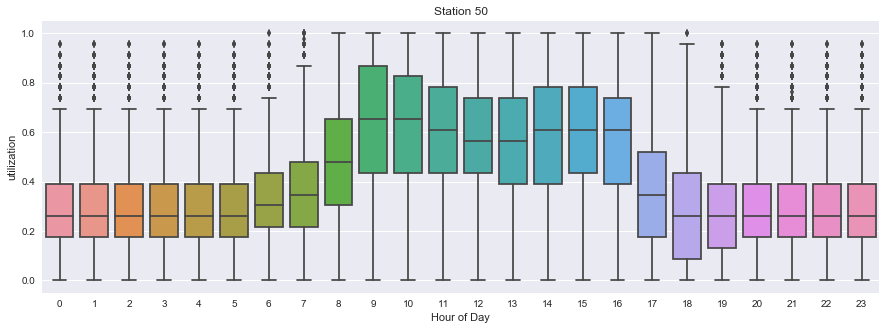

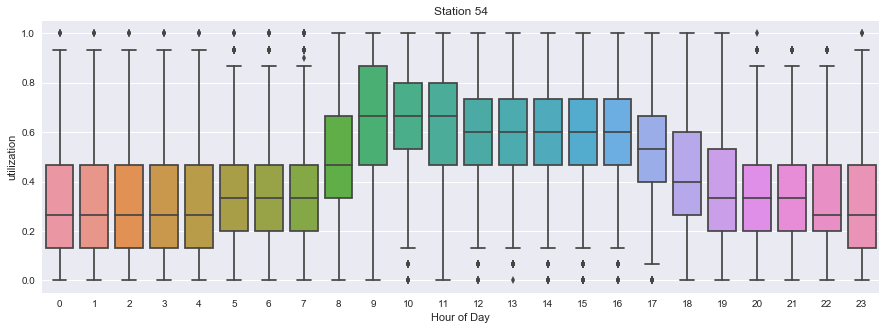

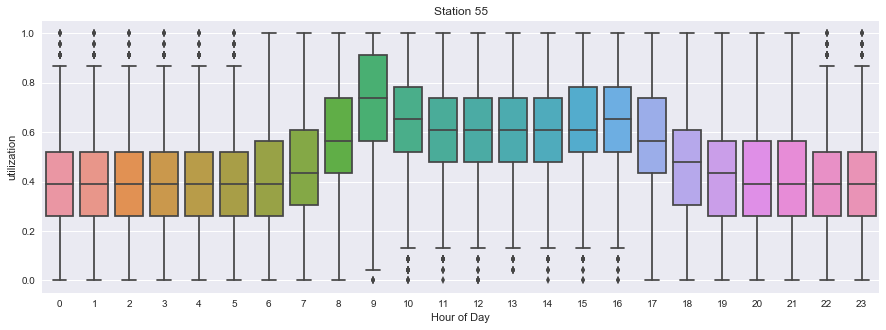

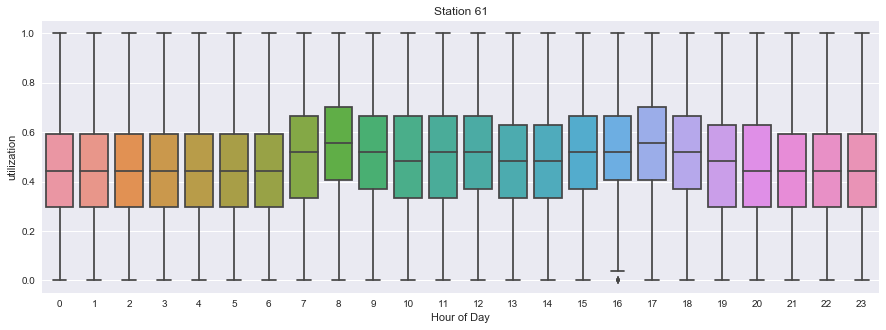

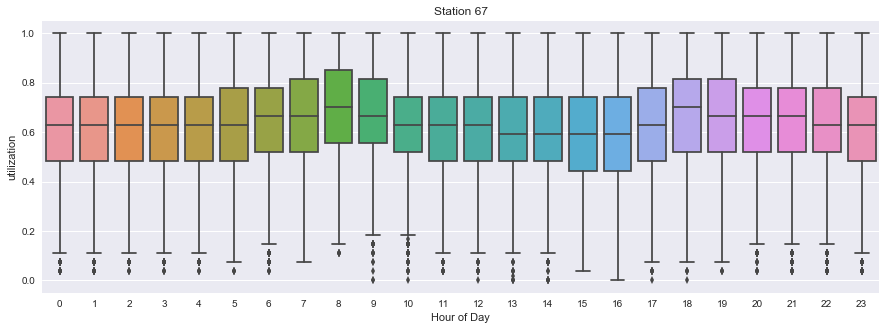

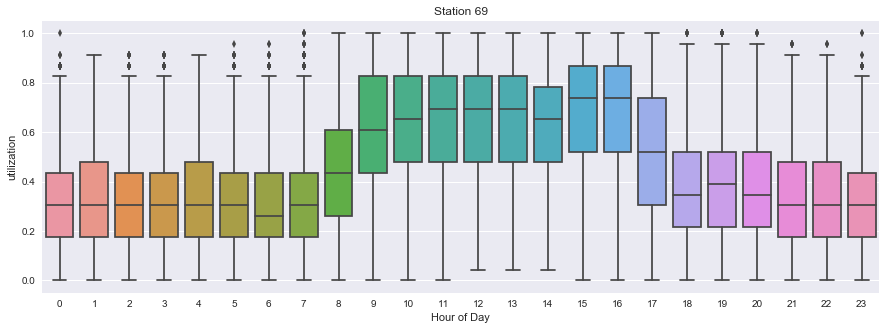

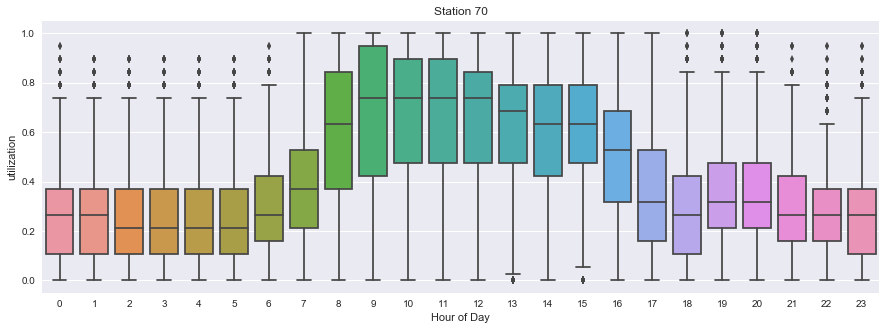

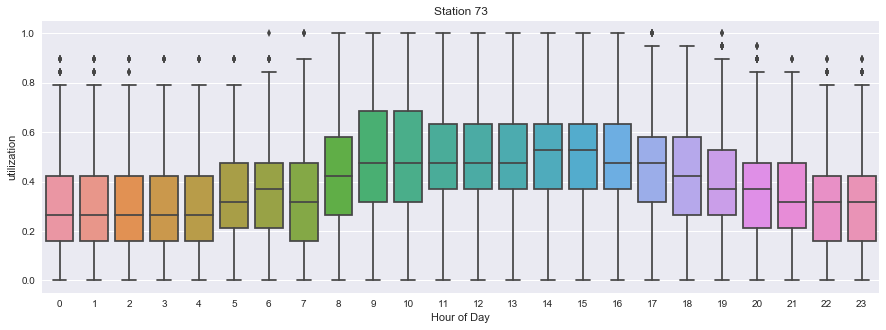

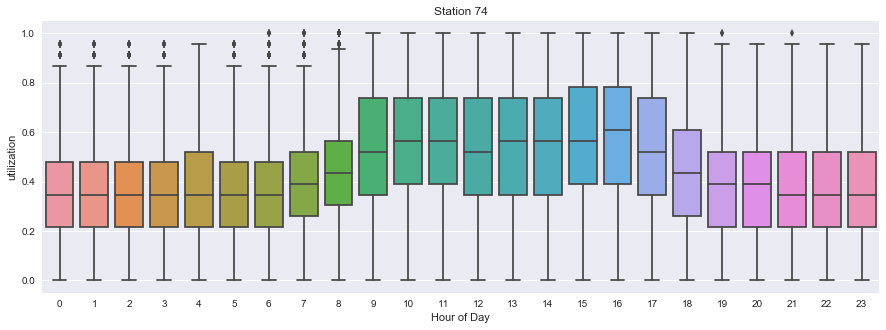

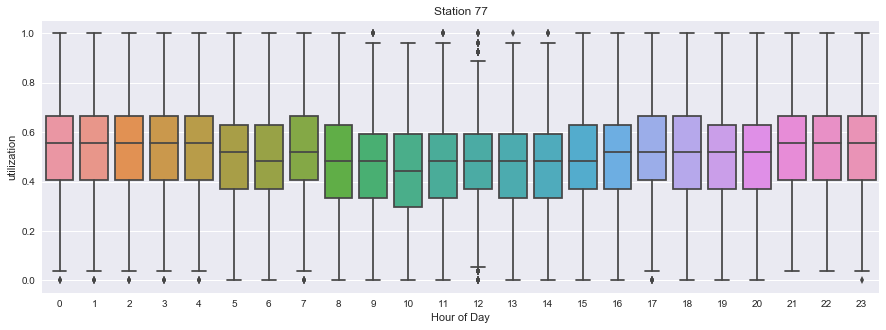

In [12]:
for i in top_am_commute_start_terms:
    temp = status_data[status_data.station_id == i]

    plt.subplots(figsize=(15,5))
    ax = sns.boxplot(x=temp.index.hour, y="utilization", data=temp)
    ax.set(xlabel='Hour of Day')
    ax.set(title='Station %s' % i)
    # plt.legend()
    plt.show()




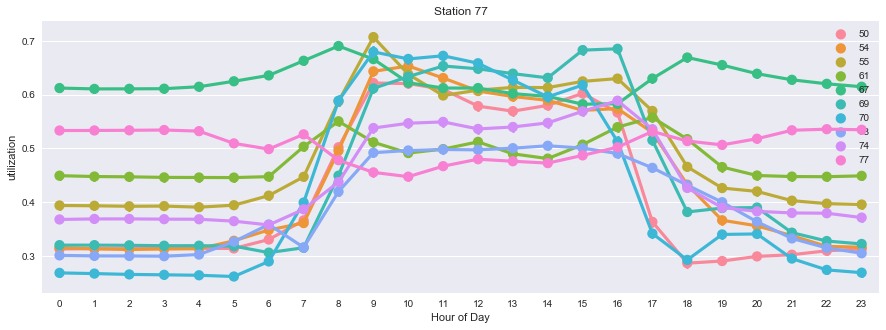

In [18]:

top_am_commute_start_terms = [50, 54, 55, 61, 67, 69, 70, 73, 74, 77]
temp = status_data[status_data.station_id.isin(top_am_commute_start_terms)]
plt.subplots(figsize=(15,5))
ax = sns.pointplot(x=temp.index.hour, y="utilization", hue='station_id', data=temp)
ax.set(xlabel='Hour of Day')
ax.set(title='Station %s' % i)
plt.legend()
plt.show()

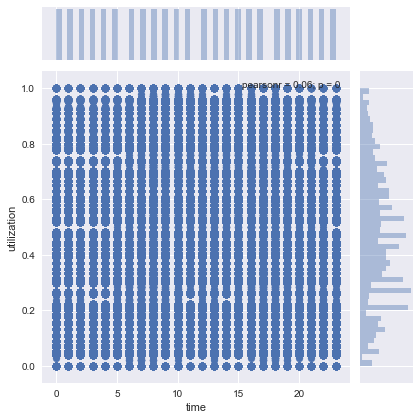

In [50]:
top_am_commute_start_terms = [50, 54, 55, 61, 67, 69, 70, 73, 74, 77]
temp = status_data[status_data.station_id.isin(top_am_commute_start_terms)]

sns.jointplot(x=temp.index.hour, y="utilization", data=temp)

In [ ]:

top_am_commute_start_terms = [50, 54, 55, 61, 67, 69, 70, 73, 74, 77]
temp = status_data[status_data.station_id.isin(top_am_commute_start_terms)]
plt.subplots(figsize=(15,5))
ax = sns.jointplot(x=temp.index.hour, y="utilization", data=temp, kind='reg')
ax.set(xlabel='Hour of Day')
ax.set(title='Station %s' % i)
plt.legend()
plt.show()

In [ ]:
status_data.groupby(['station_id', status_data.index.day, status_data.index.hour])['utilization'].mean().plot(figsize=(12,6), alpha=0.2)
plt.show()

In [ ]:
test = status_data[status_data.station_id == 73]
ax = test.groupby([test.index.hour, test.index.minute])['bikes_available'].median().plot(kind='bar', figsize=(12,6))
test.groupby([test.index.hour, test.index.minute])['bikes_available'].mean().plot(kind='line', color='g', ax=ax)
# test.groupby([test.index.hour, test.index.minute])['dock_count'].max().plot(kind='line', color='r', ax=ax)
plt.show()

In [ ]:
top_am_commute_start_terms = [50, 54, 55, 61, 67, 69, 70, 73, 74, 77]

In [ ]:
counter = 0

for station in [50, 54, 55, 61, 67, 69, 70, 73, 74, 77]:
    test = status_data[status_data.station_id == station]
    
    if counter == 0:
#         ax = test.groupby([test.index.dayofweek, test.index.hour, test.index.minute])['utilization'].mean().plot(kind='line', figsize=(12,6))
        ax = test.groupby([test.index.dayofweek, test.index.hour])['utilization'].mean().plot(kind='line', figsize=(12,6))
        counter += 1
    else:
#         test.groupby([test.index.dayofweek, test.index.hour, test.index.minute])['utilization'].mean().plot(kind='line', ax=ax)
        test.groupby([test.index.dayofweek, test.index.hour])['utilization'].mean().plot(kind='line', ax=ax)

plt.show()